In [35]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

In [36]:
def f1_score_by_batch_and_partition_size(batch_size, partition_size):
    files = [file for file in os.listdir('.') if file.endswith(f'.csv_predicted_with_batch_size_{batch_size}_partition_{partition_size}.csv') ]
    true = []
    pred = []

    for file in files:
        dataframe = pd.read_csv(file)
        true += dataframe['solution'].values.tolist()
        pred += dataframe['solution_predicted'].values.tolist()

    return accuracy_score(true, pred)

def plot_confusion_matrix_by_batch_and_partition_size(batch_size, partition_size):
    labels = ["Non-Clustered", "Clustered"]

    files = [file for file in os.listdir('.') if file.endswith(f'.csv_predicted_with_batch_size_{batch_size}_partition_{partition_size}.csv') ]
    true = []
    pred = []

    for file in files:
        dataframe = pd.read_csv(file)
        true += dataframe['solution'].values.tolist()
        pred += dataframe['solution_predicted'].values.tolist()

    confusion_matrix_data = confusion_matrix(true, pred)
    confusion_matrix_data = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    confusion_matrix_dataframe = pd.DataFrame(data=confusion_matrix_data, index=labels, columns=labels)
    sns.set(font_scale=1.0)
    color_map = sns.color_palette(palette="Blues", n_colors=7)
    sns.heatmap(data=confusion_matrix_dataframe, annot=True, annot_kws={"size": 15}, cmap=color_map, vmin=0, vmax=1)

    plt.title(f'Confusion Matrix of Node Classifier')
    plt.rcParams.update({'font.size': 15})
    plt.ylabel("Ground truth", fontsize=15)
    plt.xlabel("Predicted label", fontsize=15)
    plt.tight_layout()
    plt.show()

    #plt.savefig('node_classifier_confusion_matrix.jpg', format='jpg', dpi=300)

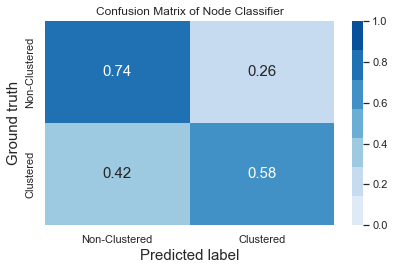

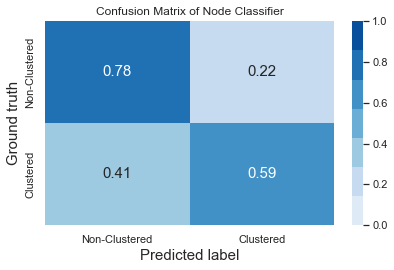

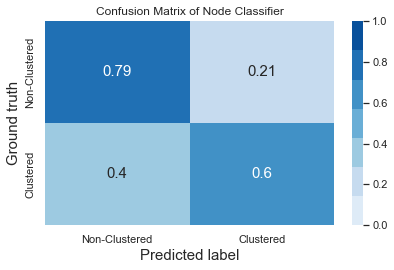

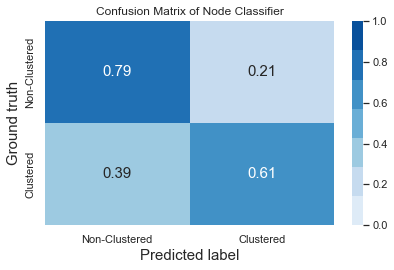

In [37]:
partition_sizes = [1000,2000,3000,4000]
f1_scores = []

for partition_size in partition_sizes:
    f1_scores.append(f1_score_by_batch_and_partition_size(1, partition_size))
    
for partition_size in partition_sizes:
    plot_confusion_matrix_by_batch_and_partition_size(1, partition_size)

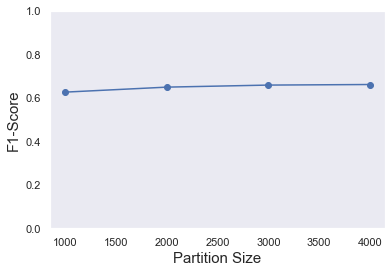

In [38]:
plt.xlabel("Partition Size")
plt.ylabel("F1-Score")
plt.grid()
plt.ylim([0,1])
plt.plot(partition_sizes, f1_scores, marker="o")